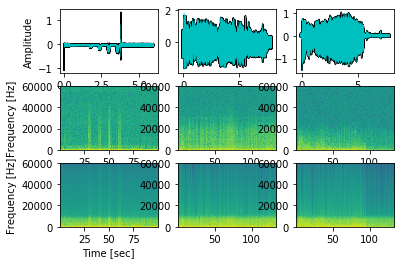

In [2]:
from os.path import dirname, join as pjoin
import scipy.io as sio
from scipy import signal
import numpy as np
import matplotlib.pyplot as plot
 

mat_fname = "C:\\уеба\\мага\\питончик\\LaPlasCompTech\\LaPlasCompTech\\30303MHG_Isat_09.mat"
mat_fname1 = "C:\\уеба\\мага\\питончик\\LaPlasCompTech\\LaPlasCompTech\\33484K-HFS.mat"
mat_fname2 = "C:\\уеба\\мага\\питончик\\LaPlasCompTech\\LaPlasCompTech\\33484K-LFS.mat"
 
mat_contents = sio.loadmat(mat_fname)
mat_contents1 = sio.loadmat(mat_fname1)
mat_contents2 = sio.loadmat(mat_fname2)
 
b, a = signal.butter(8, 0.125)
samplingFrequency = 120e3
 
sig = mat_contents['sig']
tb = mat_contents['tb']
sig1 = np.reshape(sig,(sig.size,))
tb1 = np.reshape(tb,(tb.size,))
fgust = signal.filtfilt(b, a, sig1, method="gust")
fgust1 = np.reshape(fgust,(fgust.size,))
 
sigKH = mat_contents1['sigKH']
tbKH = mat_contents1['tbKH']
sigKH1 = np.reshape(sigKH,(sigKH.size,))
tbKH1 = np.reshape(tbKH,(tbKH.size,))
fgustKH = signal.filtfilt(b, a, sigKH1, method="gust")
fgustKH1 = np.reshape(fgustKH,(fgustKH.size,))
 
sigKL = mat_contents2['sigKL']
tbKL = mat_contents2['tbKL']
sigKL1 = np.reshape(sigKL,(sigKL.size,))
tbKL1 = np.reshape(tbKL,(tbKL.size,))
fgustKL = signal.filtfilt(b, a, sigKL1, method="gust")
fgustKL1 = np.reshape(fgustKL,(fgustKL.size,))
 
plot.subplot(331)
plot.plot(tb1, sig1, 'k-')
plot.plot(tb1, fgust1, 'c-', linewidth=0.25)
plot.xlabel('Time')
plot.ylabel('Amplitude')
 
plot.subplot(332)
plot.plot(tbKH1, sigKH1, 'k-')
plot.plot(tbKH1, fgustKH1, 'c-', linewidth=0.25)
 
plot.subplot(333)
plot.plot(tbKL1, sigKL1, 'k-')
plot.plot(tbKL1, fgustKL1, 'c-', linewidth=0.25)
 
plot.subplot(334)
powerSpectrum, freqenciesFound, time, imageAxis = plot.specgram(sig1, Fs=samplingFrequency)
plot.ylabel('Frequency [Hz]')
plot.xlabel('Time [sec]')
 
plot.subplot(335)
powerSpectrum, freqenciesFound, time, imageAxis = plot.specgram(sigKH1, Fs=samplingFrequency)
 
plot.subplot(336)
powerSpectrum, freqenciesFound, time, imageAxis = plot.specgram(sigKL1, Fs=samplingFrequency)
 
plot.subplot(337)
powerSpectrum, freqenciesFound, time, imageAxis = plot.specgram(fgust1, Fs=samplingFrequency)
plot.ylabel('Frequency [Hz]')
plot.xlabel('Time [sec]')
 
plot.subplot(338)
powerSpectrum, freqenciesFound, time, imageAxis = plot.specgram(fgustKH1, Fs=samplingFrequency)
 
plot.subplot(339)
powerSpectrum, freqenciesFound, time, imageAxis = plot.specgram(fgustKL1, Fs=samplingFrequency)
 
plot.show()
 
#Не совсем понял что значит сравнить спектрограммы исходных и отфлитрованных сигналов. Визуально видно, что шума нет.
#для большей наглядности прилагают jpg